In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [103]:
%store -r X_motion_CoM_acc
%store -r Y_motion_CoM_acc
print(X_motion_CoM_acc.shape)
print(Y_motion_CoM_acc.shape)

(17401, 28)
(17401, 2)


# Multivariate Linear Regression (Foot prediction)

In [104]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [105]:
# Entries where FL foot is swinging
idx_fl_rr_swinging = np.where(X_motion_CoM_acc[:, 21] == 1)[0]
X_motion_CoM_acc_FL_RR = X_motion_CoM_acc[idx_fl_rr_swinging]
Y_motion_CoM_acc_FL_RR = Y_motion_CoM_acc[idx_fl_rr_swinging]

In [106]:
idx_fl_rr_swinging.shape

(8719,)

## Predict CoM -> x

In [107]:
X_motion_CoM_acc_FL_RR[0, :]

array([0.0, 0.0, 0.0, -0.0166785424829202, 0.028069312389957347,
       0.048986494573949754, -0.0029304265659585004, 0.043691393194541295,
       -0.009661948665229868, 0.22882891388928095, 0.16832003767417492,
       -0.409873950486413, 0.23396881506362227, -0.1683297706457312,
       -0.4099704192251716, -0.24291082649704956, 0.16426132986733352,
       -0.4133817198015584, -0.24842681151985574, -0.16367363169111387,
       -0.413723543306952, True, False, False, True, 0.1, 0.0, 0.0],
      dtype=object)

In [108]:
Y_motion_CoM_acc_FL_RR[0, :]

array([-0.005470424940550285, -0.002818667615237527], dtype=object)

### Linear Regression

In [115]:
# Input
X = np.hstack((X_motion_CoM_acc_FL_RR[:, :3], # previous motion command
               X_motion_CoM_acc_FL_RR[:, -3:], # commanded motion command
               X_motion_CoM_acc_FL_RR[:, 9:11], # FL (x,y) position
               X_motion_CoM_acc_FL_RR[:, 12:14], # FR (x,y) position
               X_motion_CoM_acc_FL_RR[:, 15:17], # RL (x,y) position
               X_motion_CoM_acc_FL_RR[:, 18:20])) # RR (x,y) position

# Labels
Y = np.array([Y_motion_CoM_acc_FL_RR[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_com_x = LinearRegression()

# Fit the model
model_fl_com_x.fit(X_train, Y_train)

# Predict
predictions = model_fl_com_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8119946122643
RMSE:  0.007942534868312671
The lowest error is:  1.8875636039333843e-06
The highest error is:  0.0444873996440336
The avg. error is:  0.00560609067183732


In [116]:
model_fl_com_x.coef_

array([[ 0.10230352, -0.0424726 , -0.0458736 ,  0.05872754,  0.01154305,
         0.00471897,  0.0631165 ,  0.20608383, -0.00774374,  0.10858619,
         0.10387338,  0.02557374, -0.0425067 ,  0.13525217]])

In [117]:
model_fl_com_x.intercept_

array([-0.00278812])

Text(0, 0.5, 'Predictions')

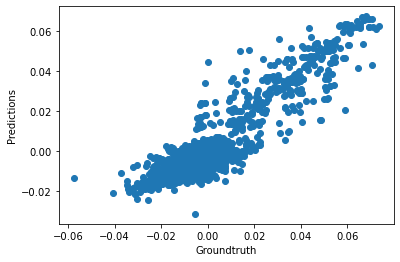

In [118]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [67]:
#%store model_fl_com_x

In [68]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [69]:
# Save model
#joblib.dump(model_fl_com_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fl_com_x.sav")

## Predict FL foot -> y

### Linear Regression

In [98]:
# Input
X = np.hstack((X_motion_CoM_acc_FL_RR[:, :3], # previous motion command
               X_motion_CoM_acc_FL_RR[:, -3:], # commanded motion command
               X_motion_CoM_acc_FL_RR[:, 9:11], # FL (x,y) position
               X_motion_CoM_acc_FL_RR[:, 12:14], # FR (x,y) position
               X_motion_CoM_acc_FL_RR[:, 15:17], # RL (x,y) position
               X_motion_CoM_acc_FL_RR[:, 18:20])) # RR (x,y) position

# Labels
Y = np.array([Y_motion_CoM_acc_FL_RR[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_com_y = LinearRegression()

# Fit the model
model_fl_com_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_com_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9010656158980397
RMSE:  0.012454178552839312
The lowest error is:  1.2058516579260825e-05
The highest error is:  0.06298677974720804
The avg. error is:  0.008615025920281344


In [99]:
model_fl_com_y.coef_

array([[-0.03148482,  0.14047126,  0.16758582,  0.01519549,  0.04456748,
         0.0613687 ,  0.10037632, -0.21904149,  0.13816629,  0.14549049,
        -0.20060809, -0.00468627,  0.04287531, -0.05464679]])

In [102]:
model_fl_com_y.intercept_

array([-0.04688473])

Text(0, 0.5, 'Predictions')

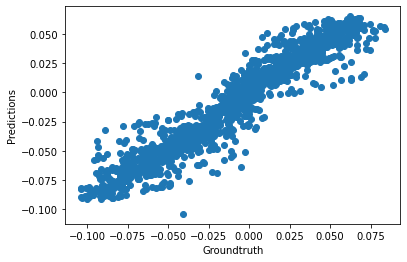

In [101]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [82]:
#%store model_fl_com_y

In [83]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [84]:
# Save model
#joblib.dump(model_fl_com_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fl_com_y.sav")